c:\users\jiwoo\appdata\local\programs\python\python39\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


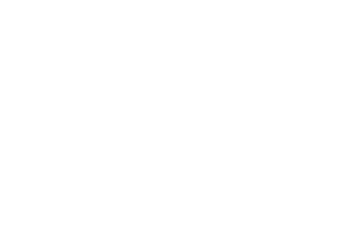

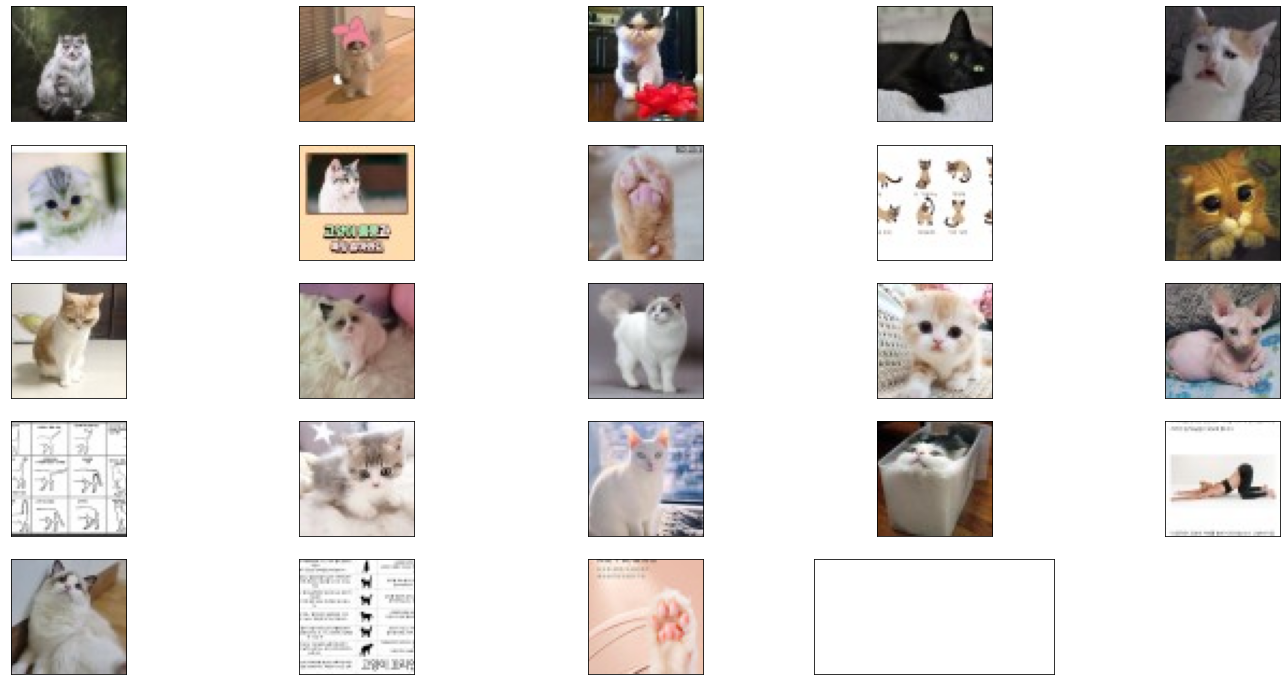

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
from selenium import webdriver
import cv2
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

driver_path = "chromedriver.exe"
drivers = webdriver.Chrome(executable_path=driver_path)

url ='https://search.naver.com/search.naver?sm=tab_hty.top&where=image&query=&oquery=%EB%84%A4%EC%9D%B4%EB%B2%84+%EC%9D%B4%EB%AF%B8%EC%A7%80&tqi=hOSwCdp0JywssiMJFndssssstmK-522138'
drivers.get(url)

drivers.find_element_by_xpath('//*[@id="nx_query"]').send_keys('고양이')
drivers.find_element_by_xpath('//*[@id="nx_search_form"]/fieldset/button/i').click()
drivers.execute_script("window.scrollTo(0, 1000)")


soup = BeautifulSoup(drivers.page_source, 'html.parser')


def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype='uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    im_rgb= cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    return im_rgb


plt.axis('off')
plt.figure(figsize=(25,25))

for i in range(10,60):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(url_to_image(soup.find_all('img')[i].attrs['src']))
plt.show()


[<img alt="NAVER" height="60" src="https://ssl.pstatic.net/sstatic/search/nlogo/20220104175633.png" width="58"/>,
 ,
 ,
 <img alt="N페이, 이벤트 참여하면 포인트 적립!" height="47" id="gnb_promo" src="https://ssl.pstatic.net/static/common/gnb/banner/promo_npay_200108.png" width="265"/>,
 <img alt="" height="38" onerror="this.parentNode.style.display='none';" src="https://search.pstatic.net/common/?src=http%3A%2F%2Fkinimage.naver.net%2F20200412_283%2F15866790143869O7SU_JPEG%2F%EA%B0%95%EC%95%84%EC%A7%802.jpg&amp;type=f54_54" width="38"/>,
 <img alt="" height="38" onerror="this.parentNode.style.display='none';" src="https://search.pstatic.net/common/?src=http%3A%2F%2Fkinimage.naver.net%2F20201213_59%2F1607820513651Bmvko_JPEG%2F1607820513220.jpg&amp;type=f54_54" width="38"/>,
 <img alt="" height="38" onerror="this.parentNode.style.display='none';" src="https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMDEyMDhfODIg%2FMDAxNjA3NDExMjI3MzY2.Fbitn0DxZf2FJk4Wb_RGO6p1K3EeYPE0f0swK1M
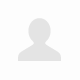
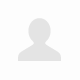

In [5]:
soup.find_all('img')